In [57]:
import matplotlib.pyplot as plt
import numpy as np
from TemporalNetwork import ContTempNetwork
import benchmark_methods
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [58]:
net_heat1 = ContTempNetwork.load('evolving_SBM_net_merges')
net_heat2 = ContTempNetwork.load('agents_SBM/agents_SBM_net1_b')

In [59]:
N = net_heat1.num_nodes

# Example matrices for demonstration
matrix1_1 = net_heat2.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2_1 = net_heat2.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3_1 = net_heat2.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

In [60]:
# Define the time intervals for the x-axis
time_intervals_123 = [(0, 100), (100, 200),  (200, 300)]
window = 500

In [61]:
selected_lamdas = np.logspace(-3,1,10)
Conditional_S_selected1 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net1_b/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected1.append(S_rate['window_S'][f'{lamda:.11f}'])

In [62]:
color_forw = 'lightseagreen'

/tmp/ipykernel_1898196/3239420771.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


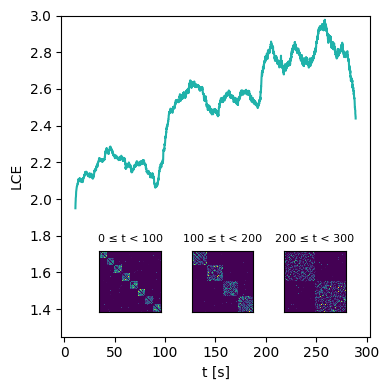

In [63]:
# Column 1: Plot A
fig = plt.figure(figsize=(4, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 1)  # Grid: 1 row, 4 columns

ax_a = fig.add_subplot(gs[0, 0])
index = 4
S = Conditional_S_selected1[index]

ax_a.plot(net_heat2.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)

ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("LCE")
ax_a.set_ylim(1.25, 3)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

plt.tight_layout()
plt.savefig('/home/b/skoove/Desktop/NetSci2025/mergemerge_LCE_slides.jpg', format='jpg', dpi=300)

## Snapshot Network

In [64]:
source_nodes = []
target_nodes = []
starting_times = []
ending_times = []


for i in range(0, 296, 5):
    matrix_snapshot = net_heat1.compute_static_adjacency_matrix(start_time=i, end_time=i+5).toarray()
    matrix_snapshot = (matrix_snapshot > 0).astype(int)
    source_nodes_snapshot = np.nonzero(matrix_snapshot)[0]
    target_nodes_snapshot = np.nonzero(matrix_snapshot)[1]
    starting_times_snapshot = [i] * len(source_nodes_snapshot)
    ending_times_snapshot = [i+5] * len(source_nodes_snapshot)

    source_nodes += list(source_nodes_snapshot)
    target_nodes += list(target_nodes_snapshot)
    starting_times += starting_times_snapshot
    ending_times += ending_times_snapshot

In [65]:
snapshot_network = ContTempNetwork(source_nodes=source_nodes,
                       target_nodes=target_nodes,
                       starting_times=starting_times,
                       ending_times=ending_times,
                       merge_overlapping_events=True)

PID  1898196  :  merged  5408  events
PID  1898196  :  merged  0  events


In [66]:
snapshot_network.times

Index([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205,
       210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275,
       280, 285, 290, 295, 300],
      dtype='int64', name='times')

In [67]:
snapshot_network.compute_laplacian_matrices(random_walk = False, save_adjacencies=True)

In [68]:
# for snap in snapshot_network.adjacencies:
#     plt.matshow(snap.toarray())

In [69]:
window_length = 6
n_eigen = 6

# NCPD

In [70]:
d_gamma, t_gamma = benchmark_methods.NCPD(snapshot_network.adjacencies, window_length=window_length, n_eigen=n_eigen)

/tmp/ipykernel_1898196/2553935201.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


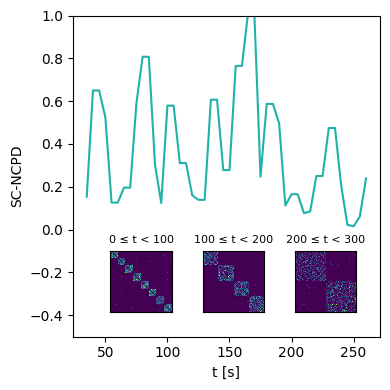

In [71]:
# Column 1: Plot A
fig = plt.figure(figsize=(4, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 1)  # Grid: 1 row, 4 columns

ax_a = fig.add_subplot(gs[0, 0])
index = 4
S = Conditional_S_selected1[index]

ax_a.plot(snapshot_network.times[t_gamma], d_gamma, color=color_forw, alpha=1)

ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("SC-NCPD")
ax_a.set_ylim(-0.5, 1)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

plt.tight_layout()
plt.savefig('/home/b/skoove/Desktop/NetSci2025/mergemerge_NCPD_slides.jpg', format='jpg', dpi=300)

# CUMSUM

In [72]:
window_length = 6

In [73]:
Y, t_cumsum = benchmark_methods.CUMSUM(snapshot_network.adjacencies, window_length=window_length)

/tmp/ipykernel_1898196/3089059597.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


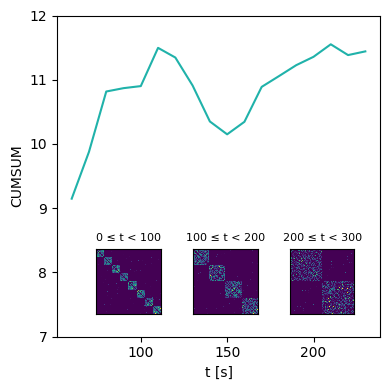

In [74]:
# Column 1: Plot A
fig = plt.figure(figsize=(4, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 1)  # Grid: 1 row, 4 columns

ax_a = fig.add_subplot(gs[0, 0])
index = 4
S = Conditional_S_selected1[index]

ax_a.plot(snapshot_network.times[t_cumsum], Y, color=color_forw, alpha=1)

ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("CUMSUM")
ax_a.set_ylim(7, 12)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

plt.tight_layout()
plt.savefig('/home/b/skoove/Desktop/NetSci2025/mergemerge_CUMSUM_slides.jpg', format='jpg', dpi=300)

# CUMSUM 2

In [75]:
stat, t = benchmark_methods.CUMSUM_2(snapshot_network.adjacencies, window_length=2*window_length)

/tmp/ipykernel_1898196/3703788362.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


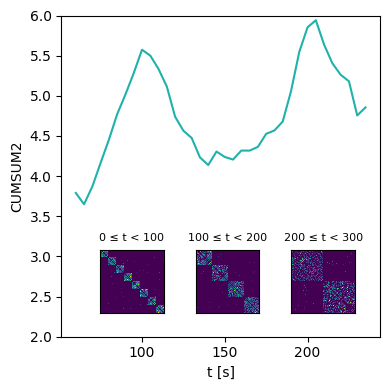

In [76]:
# Column 1: Plot A
fig = plt.figure(figsize=(4, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 1)  # Grid: 1 row, 4 columns

ax_a = fig.add_subplot(gs[0, 0])
index = 4
S = Conditional_S_selected1[index]

ax_a.plot(snapshot_network.times[t], stat, color=color_forw, alpha=1)

ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("CUMSUM2")
ax_a.set_ylim(2, 6)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

plt.tight_layout()
plt.savefig('/home/b/skoove/Desktop/NetSci2025/mergemerge_CUMSUM2_slides.jpg', format='jpg', dpi=300)

# Average Frobenius Distance

In [77]:
frob_dist, t_frob = benchmark_methods.avg_frobenius_distance(snapshot_network.adjacencies, window_length=window_length)

/tmp/ipykernel_1898196/4006601111.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


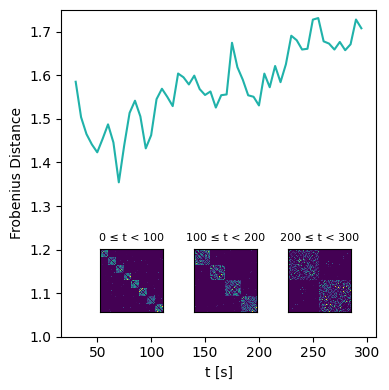

In [78]:
# Column 1: Plot A
fig = plt.figure(figsize=(4, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 1)  # Grid: 1 row, 4 columns

ax_a = fig.add_subplot(gs[0, 0])
index = 4
S = Conditional_S_selected1[index]

ax_a.plot(snapshot_network.times[t_frob], frob_dist, color=color_forw, alpha=1)

ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Frobenius Distance")
ax_a.set_ylim(1, 1.75)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

plt.tight_layout()
plt.savefig('/home/b/skoove/Desktop/NetSci2025/mergemerge_Frobenius_slides.jpg', format='jpg', dpi=300)